In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('../data/processed/all_job_offers_13_03_2022.csv')
df.head()

,name,company,technology,job,location.city,location.country,salary.low,salary.high,salary.currency,salary.avg,is_senior
0,data engineer,dentsu Polska,SQL,data_engineer,warszawa,POL,13000,16000,PLN,14500.0,False
1,remote data engineer,Mindbox S.A.,NaN,data_engineer,zdalna,NaN,23100,30450,PLN,26775.0,False
2,data engineer,Avanade Poland,SQL,data_engineer,warszawa,POL,15000,25000,PLN,20000.0,False
3,data engineer (microsoft),Onwelo S.A.,NaN,data_engineer,zdalna,NaN,13650,17850,PLN,15750.0,False
4,data engineer,Phorest,looker,data_engineer,zdalna,NaN,16773,23962,PLN,20367.5,False


job
data_analyst      29
data_engineer     96
data_scientist    26
dtype: int64


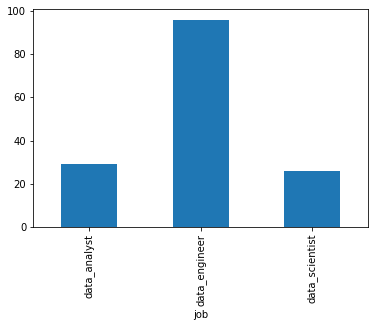

In [64]:
job_offers = df.groupby(by=['job']).size()
job_offers.plot.bar()

print(job_offers)

location.city  job           
budapest       data_engineer      4
               data_scientist     1
gdańsk         data_analyst       1
               data_engineer      1
kraków         data_analyst       1
               data_engineer      2
malbork        data_engineer      1
poznań         data_engineer      3
sopot          data_scientist     1
warszawa       data_analyst       6
               data_engineer      9
               data_scientist     6
wrocław        data_engineer      1
               data_scientist     1
zdalna         data_analyst      21
               data_engineer     75
               data_scientist    16
łódź           data_scientist     1
dtype: int64


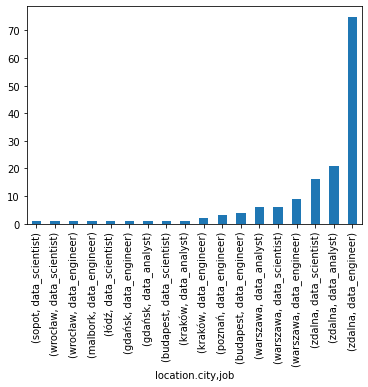

In [65]:
offers_by_city = df.groupby(by=['location.city', 'job']).size()
offers_by_city.sort_values().plot.bar()
print(offers_by_city)

array([[<AxesSubplot:title={'center':'salary.avg'}, xlabel='job'>,
        <AxesSubplot:title={'center':'count'}, xlabel='job'>]],
      dtype=object)

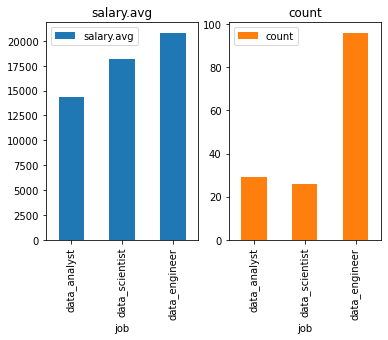

In [66]:
offer_salary = df.groupby(by=['job']).agg({'salary.avg': 'mean', 'name': 'count'})
offer_salary.sort_values(by=['salary.avg'], inplace=True)
offer_salary.rename(columns={'name':'count'}, inplace=True)
offer_salary.plot(subplots=True, layout=(1, 2), kind='bar')

In [67]:
offer_salary_by_city = df.groupby(by=['location.city']).agg({'salary.avg': 'mean', 'name': 'count'})
offer_salary_by_city.sort_values(by=['salary.avg'], inplace=True)
offer_salary_by_city.rename(columns={'name':'count'}, inplace=True)
offer_salary_by_city

,salary.avg,count
location.city,,
malbork,5500.000000,1
sopot,9750.000000,1
łódź,12000.000000,1
budapest,13449.800000,5
poznań,13500.000000,3
gdańsk,14700.000000,2
warszawa,15297.619048,21
kraków,16166.666667,3
wrocław,20160.000000,2


<AxesSubplot:xlabel='location.city'>

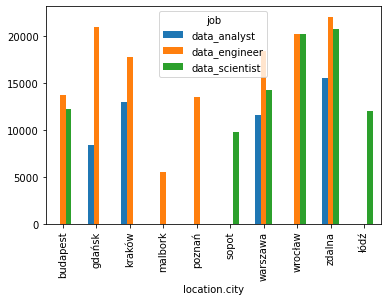

In [68]:
df.pivot_table(index='location.city', columns='job', values='salary.avg').plot(kind='bar')

In [69]:
salary_by_senior = df.groupby(by=['job', 'is_senior']).agg({'salary.avg': 'mean', 'name': 'count'})
salary_by_senior['salary.avg'] = salary_by_senior['salary.avg'].round(2)
salary_by_senior

salary.avg  name
job            is_senior                  
data_analyst   False        13783.37    26
               True         19300.00     3
data_engineer  False        19822.71    75
               True         24364.19    21
data_scientist False        16188.56    17
               True         21794.94     9